In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

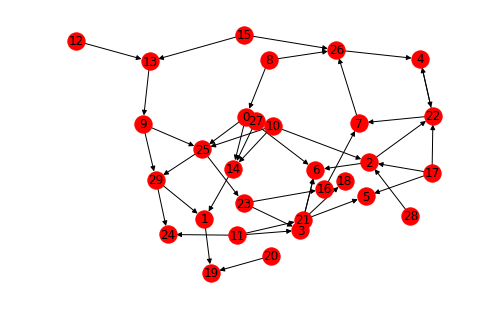

In [2]:
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels = True)

In [25]:
def random_walk(graph, steps, alpha):
    n_nodes = len(list(g.nodes()))
    n_visits = list(np.zeros(n_nodes))
    start_node = np.random.choice(range(n_nodes))
    n_visits[start_node] += 1
    for _ in range(steps): 
        if np.random.uniform() <= alpha: 
            if list(g.neighbors(start_node)):
                new_neighbor = np.random.choice(list(g.neighbors(start_node)))
                n_visits[new_neighbor] += 1
                start_node = new_neighbor
            else: 
                new_neighbor = np.random.choice(range(n_nodes))
                n_visits[new_neighbor] += 1
                start = new_neighbor
        else: 
            new_neighbor = np.random.choice(range(n_nodes))
            n_visits[new_neighbor] += 1
            start_node = new_neighbor
    return np.array(n_visits)/(steps+1)

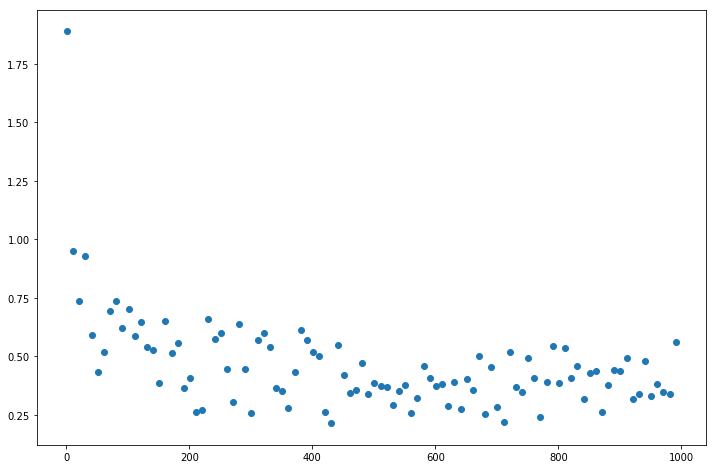

In [31]:
pagerank_vals = np.array(list(nx.pagerank(g).values()))
steps = range(1, 1000, 10)
diffs = []
for n in steps: 
    n_visits_average = random_walk(g, n, 0.85)
    diffs.append(np.sum(np.abs(n_visits_average-pagerank_vals)))
    
plt.figure(figsize=(12,8))
plt.scatter(steps, diffs)
plt.show()